# Class 06: Graphing in Python 2 part 1

Matplotlib - density plots & 2D graphics 

- Complete the activities as instructed by the professor

#### Import any packages we need below (update as we go):

In [2]:
import numpy as np
import math as  m
import matplotlib.pyplot as plt
import qdraw as qd

## Density Plots 


####  Creating a density plot

- Read in the 'circular.txt' data
- create a density plot
- switch the origin to the lower left


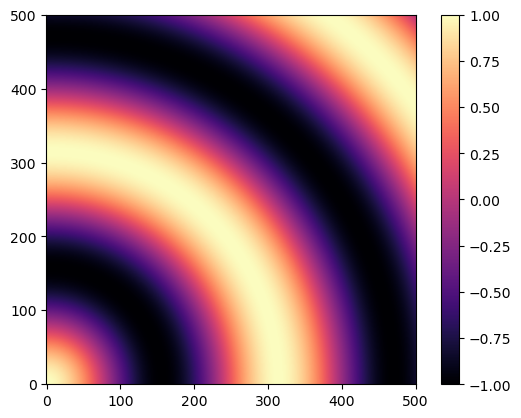

In [37]:
Circular_Data = np.loadtxt("circular.txt", float)
plt.imshow(Circular_Data, origin = 'lower')
plt.colorbar()
plt.magma()
plt.show()

#### Color-scales and colorbars
-  For the plot above: 
    - change the color-scale 
    - add a colorbar

#### Additional Density Plot Customizations 
- Play around with `extent` to see how it impacts the density plot 
- change the axis ratio using `aspect`

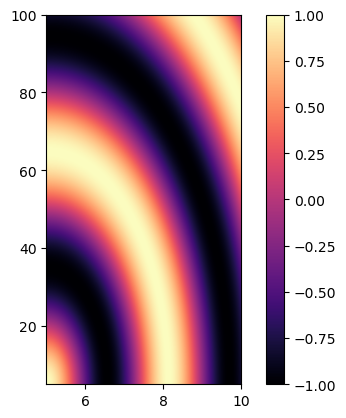

In [54]:
plt.imshow(Circular_Data, origin='lower', extent=[5,10,5,100], aspect=10/100)
plt.colorbar()
plt.show()

#### Book Example: Wave interference (page 108)

Suppose we drop a pebble in a pond and waves radiate out from the spot where it fell. We could create a simple representation of the physics with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time. If the center of the circle is at $x_1$, $y_1$ then the distance $r_1$ to the center from a point $x, y$ is

For the distance from the center of a circlular wave:

$$ r_1 = \sqrt{(x-x_1)^2+(y-y_1)^2} $$
and the height of the wave on a surface would be sinusoidal:

$$ h_1(x,y) = h_0\sin{kr_1} $$
where $k = 2\pi/\lambda$ is the wave vector. 

To superimpose two waves, we need a second set of distances and heights: 

$$ r_2 = \sqrt{(x-x_2)^2+(y-y_2)^2} $$

$$ h_2(x,y) = h_0\sin{kr_2} $$


The superposition is of the heights at any location: 

$$ h(x,y) = h_0\sin{kr_1} + h_0\sin{kr_2}$$

Suppose the wavelength of the waves is $\lambda$ = 5 cm, the amplitude is 1 cm, and the centers of the circles are 20 cm apart. Here is a program to make an image of the height over a 1 m square region of the pond. To make the image we create an array of values representing the height $h$ at a grid of points and then use that array to make a density plot. In this example we use a grid of 500 × 500 points to cover the 1 m square, which means the grid points have a separation of 100/500 = 0.2 cm.

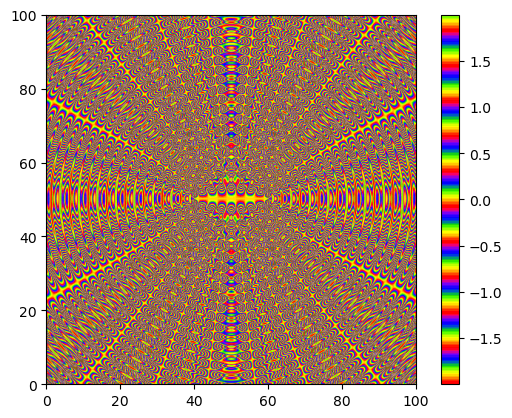

In [80]:
# Constants:
wavelength = 5 #cm
wave_number = 2*m.pi/wavelength #rad/cm
height_Amplitude = 1.0 #cm
separation = 20 #cm

# Density plot:
side_length = 100 #cm
point_count = 500
spacing = side_length/point_count #cm

# Positions/Origins:
x_1 = side_length/2 - separation/2
y_1 = side_length/2
x_2 = side_length/2 + separation/2
y_2 = side_length/2

# Height Array to be calculated
Height = np.zeros([point_count,point_count],float)

# Definitions of Functions:
def Distance_2D_func(x,X,y,Y):
    return np.sqrt((x-X)**2 + (y-Y)**2)
def Height_func(h,k,r):
    return h*np.sin(k*r)

for i in range(point_count):
    y = i*spacing
    for j in range(point_count):
        x = j*spacing
        Height[i,j] = Height_func(height_Amplitude, wave_number, Distance_2D_func(x,x_1,y,y_1)) + Height_func(height_Amplitude, wave_number, Distance_2D_func(x,x_2,y,y_2))

# Make density plot
plt.imshow(Height, origin = 'lower', extent = [0,side_length,0,side_length])
plt.prism()
plt.colorbar()
plt.show()




#### Create an array to make a density plot

Create an array that is 50x50 for a density plot. To do so: 
- create a 1D array `theta` that is 50 values equally spaced between 0 and 3$\pi$ 
- create an 2 arrays: each should be a 1D array that is $5\sin$(`theta`)
- Now, in a 2D array that is 50x50, loop through the add the two arrays together 

In [ ]:
theta_array = np.pi*np.linspace(0,3,50)


## Drawings in Python

In [ ]:
# Moved to top

#### Let's create a window that has a circle

- Note, you must use `draw()` for the separate window to pop up. It will remain open and continue to update each time you call `draw()` again 
    - you will have to restart the kernel when it is closed though! 
- You can alternatively use `show()` but if you then close the window, which you will have to, you will need to restart the kernel to do anything else. 

In [ ]:
#qd.window(xlim = [-1,1],ylim=[-1,1])
#qd.circle(pos=[0,0],size=1, color="blue")
#qd.draw()

#### We can add a second circle that is green!

In [ ]:
qd.window(xlim = [-1,1],ylim=[-1,1])
circle2 = qd.circle(pos=[0.1,0.3],size=0.1,color='red')
qd.draw()

: 

#### And we can put a lattice of squares on top of that. 

In [ ]:
count = 2
for i in range(count):
    for j in range(count):
        qd.square(pos=[i,j], size = 0.1, color = '#3f1f4f')
        draw(0.5)

#### Atomic Lattice Example

#### Let's make a circle move! 